In [ ]:
# A. Setup & paths (Notebook-safe)
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

def find_project_root(start: Path = Path.cwd()) -> Path:

    for p in [start, *start.parents]:
        if (p / "data").exists():
            return p
    raise RuntimeError("Couldn't locate project root (looked for a 'data' folder).")

ROOT = find_project_root()
DATA_RAW = ROOT / "data" / "raw"
DATA_PROCESSED = ROOT / "data" / "processed"
DOCS = ROOT / "docs"

# if missing
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)
DOCS.mkdir(parents=True, exist_ok=True)

# notebook display defaults
pd.options.display.max_rows = 25
pd.options.display.max_columns = 60

print("ROOT:", ROOT)
print("RAW :", DATA_RAW)
print("PROC:", DATA_PROCESSED)

CDC Weekly: (10663, 5)
CDC Disparities: (1229, 10)
BRFSS 2020 EDA: (319795, 18)
BRFSS 2022 EDA: (445132, 5)
BRFSS 2020 READY: (319795, 35)
BRFSS 2022 READY: (445132, 16)
Equity: (18698, 43)
RaceH in brfss20_eda? True
RaceH in brfss20_ready? False

CDC Weekly Cases & Deaths


,end_of_week,age_group,race_h,case_rate,death_rate
0,2020-03-07,50 - 64 Years,Hispanic,3.71,0.30
1,2020-03-07,18 - 29 Years,NH_White,0.87,NaN
2,2020-03-07,40 - 49 Years,NH_White,2.02,0.03



Missing values per column:
death_rate     5991
case_rate       112
end_of_week       0
age_group         0
race_h            0
dtype: int64

Numeric Summary:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
end_of_week,10663,NaN,NaN,NaN,2022-01-11 22:35:43.861952512,2020-03-07 00:00:00,2021-02-06 00:00:00,2022-01-15 00:00:00,2022-12-17 00:00:00,2023-11-18 00:00:00,NaN
age_group,10663,11,50 - 64 Years,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_h,10663,5,Hispanic,2134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_rate,10551.0,NaN,NaN,NaN,100.955715,0.11,31.345,66.54,125.96,994.74,116.703626
death_rate,4672.0,NaN,NaN,NaN,4.06884,0.01,0.28,1.05,3.9225,100.72,8.792607



BRFSS 2020 EDA Survey


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,GenHealthOrd,Sex,AgeCat,RaceH,Diabetic
0,0,17.92,3.0,30.0,5.0,1,0,0,0,1,1,0,1,4,Female,55-59,NH_White,Yes
1,0,20.34,0.0,0.0,7.0,0,0,1,0,1,0,0,0,4,Female,80 or older,NH_White,No
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,1,0,0,2,Male,65-69,NH_White,Yes



Missing values per column:
HeartDisease        0
BMI                 0
RaceH               0
AgeCat              0
Sex                 0
GenHealthOrd        0
SkinCancer          0
KidneyDisease       0
Asthma              0
PhysicalActivity    0
dtype: int64

Numeric Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,<NA>,<NA>,<NA>,0.085595,0.279766,0.0,0.0,0.0,0.0,1.0
BMI,319795.0,NaN,NaN,NaN,28.277699,6.072045,17.92,24.03,27.34,31.42,48.66
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
SleepTime,319795.0,NaN,NaN,NaN,7.090961,1.349655,3.0,6.0,7.0,8.0,12.0
Smoking,319795.0,<NA>,<NA>,<NA>,0.412477,0.492281,0.0,0.0,0.0,1.0,1.0
AlcoholDrinking,319795.0,<NA>,<NA>,<NA>,0.068097,0.251912,0.0,0.0,0.0,0.0,1.0
Stroke,319795.0,<NA>,<NA>,<NA>,0.03774,0.190567,0.0,0.0,0.0,0.0,1.0
DiffWalking,319795.0,<NA>,<NA>,<NA>,0.13887,0.345812,0.0,0.0,0.0,0.0,1.0
PhysicalActivity,319795.0,<NA>,<NA>,<NA>,0.775362,0.417344,0.0,1.0,1.0,1.0,1.0



BRFSS 2022 EDA Survey


,HadHeartAttack,BMI,Sex,AgeCat,RaceH
0,0,27.44,Female,80 or older,Other/Multiple
1,0,26.57,Female,80 or older,Other/Multiple
2,0,25.61,Female,55 to 59,Other/Multiple



Missing values per column:
AgeCat            9079
HadHeartAttack       0
BMI                  0
Sex                  0
RaceH                0
dtype: int64

Numeric Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HadHeartAttack,445132.0,<NA>,<NA>,<NA>,0.056406,0.230704,0.0,0.0,0.0,0.0,1.0
BMI,445132.0,NaN,NaN,NaN,28.363565,5.901311,17.75,24.41,27.44,31.01,49.5
Sex,445132,2,Female,235893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCat,436053,13,65 to 69,47099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RaceH,445132,2,Other/Multiple,402215,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Equity Dataset


,patient_state,patient_zip3,patient_age,payer_type,patient_race,bmi,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,unemployment_rate,poverty,limited_english,health_uninsured,Ozone,PM25,home_wealth,wealth_index,education_ratio,hh_income_ratio,DiagPeriodL90D,RaceH
0,CA,924,84,MEDICAID,White,27.240685,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,264634.2857,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,8.471429,22.542857,10.100000,11.200000,52.237210,8.650555,11.798909,21.602549,2.863469,0.373972,1.0,NH_White
1,CA,928,62,COMMERCIAL,White,28.490000,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,677688.5152,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,5.103030,10.109091,8.057576,7.018182,42.301121,8.487175,41.653200,2.917221,0.395453,0.078278,1.0,NH_White
2,TX,760,43,COMMERCIAL,White,38.090000,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,237713.0545,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,4.560000,9.663333,3.356667,15.066667,40.108207,7.642753,17.292436,2.228523,0.362889,0.095774,1.0,NH_White



Missing values per column:
DiagPeriodL90D                5792
patient_state                    0
poverty                          0
education_less_highschool        0
education_highschool             0
education_some_college           0
education_bachelors              0
education_graduate               0
education_college_or_above       0
education_stem_degree            0
dtype: int64

Numeric Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_state,18698,50,CA,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_zip3,18698.0,NaN,NaN,NaN,572.658841,275.403827,101.0,331.0,554.0,840.0,999.0
patient_age,18698.0,NaN,NaN,NaN,59.21168,13.255279,18.0,50.0,59.0,67.0,91.0
payer_type,18698,3,COMMERCIAL,10414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_race,18698,5,White,12458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,18698.0,NaN,NaN,NaN,28.987867,4.406646,14.0,26.167847,28.66021,31.551076,85.0
income_household_median,18698.0,NaN,NaN,NaN,74197.866032,20649.330647,29222.0,61284.45333,69729.95349,83271.25,164119.1765
income_household_under_5,18698.0,NaN,NaN,NaN,3.270606,1.4477,0.75,2.260924,2.838235,4.013559,19.62
income_household_5_to_10,18698.0,NaN,NaN,NaN,2.516352,1.33388,0.361538,1.536364,2.172414,3.108163,11.872222
income_household_10_to_15,18698.0,NaN,NaN,NaN,4.153317,1.763052,1.015385,2.897826,3.753571,5.093333,14.277778


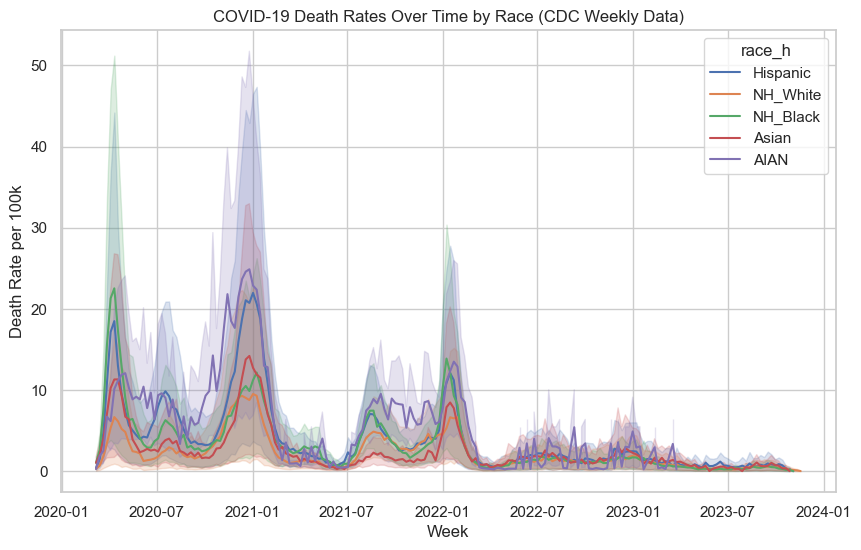

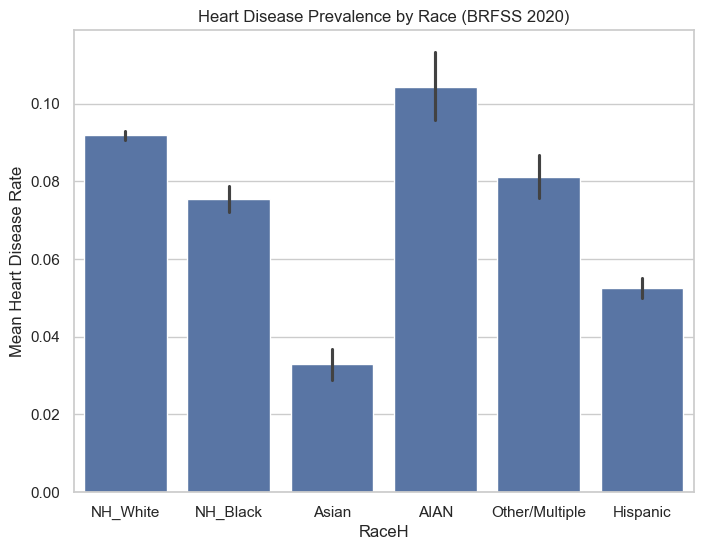

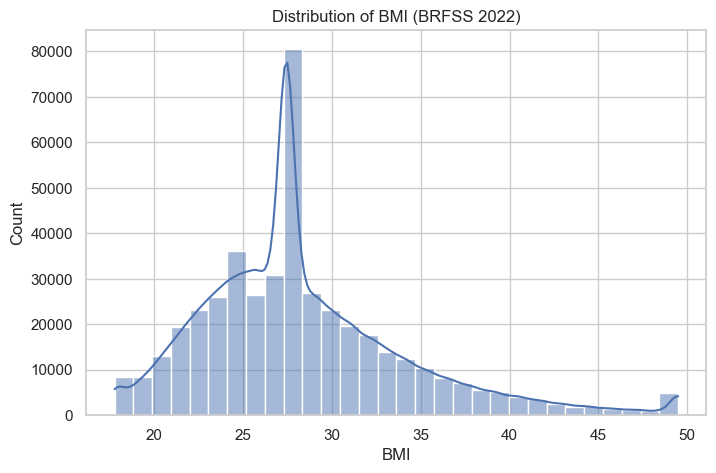

In [49]:
# B. Load Cleaned Datasets
cdc        = pd.read_parquet(DATA_PROCESSED / "cdc_weekly_clean.parquet")
cdc_disp   = pd.read_parquet(DATA_PROCESSED / "cdc_disparities_by_week.parquet")

# EDA versions (contain categorical RaceH etc.)
brfss20_eda = pd.read_parquet(DATA_PROCESSED / "brfss2020_eda.parquet")
brfss22_eda = pd.read_parquet(DATA_PROCESSED / "brfss2022_eda.parquet")

# READY versions (machine-learning ready — one-hot encoded)
brfss20_ready = pd.read_parquet(DATA_PROCESSED / "brfss2020_ready.parquet")
brfss22_ready = pd.read_parquet(DATA_PROCESSED / "brfss2022_ready.parquet")

equity = pd.read_parquet(DATA_PROCESSED / "equity_selected.parquet")

# C. Sanity
print("CDC Weekly:", cdc.shape)
print("CDC Disparities:", cdc_disp.shape)
print("BRFSS 2020 EDA:", brfss20_eda.shape)
print("BRFSS 2022 EDA:", brfss22_eda.shape)
print("BRFSS 2020 READY:", brfss20_ready.shape)
print("BRFSS 2022 READY:", brfss22_ready.shape)
print("Equity:", equity.shape)

print("RaceH in brfss20_eda?", "RaceH" in brfss20_eda.columns)
print("RaceH in brfss20_ready?", "RaceH" in brfss20_ready.columns)

#D. quick overview
def quick_overview(df, name):
    print(f"\n{name}")
    display(df.head(3))
    print("\nMissing values per column:")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("\nNumeric Summary:")
    display(df.describe(include='all').T.head(10))

quick_overview(cdc, "CDC Weekly Cases & Deaths")
quick_overview(brfss20_eda, "BRFSS 2020 EDA Survey")
quick_overview(brfss22_eda, "BRFSS 2022 EDA Survey")
quick_overview(equity, "Equity Dataset")

#  E. Exploratory Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# CDC deaths by race over time
plt.figure(figsize=(10,6))
sns.lineplot(data=cdc, x="end_of_week", y="death_rate", hue="race_h")
plt.title("COVID-19 Death Rates Over Time by Race (CDC Weekly Data)")
plt.xlabel("Week")
plt.ylabel("Death Rate per 100k")
plt.show()

# BRFSS 2020 – Heart disease rate by Race (EDA version)
plt.figure(figsize=(8,6))
sns.barplot(data=brfss20_eda, x="RaceH", y="HeartDisease", estimator=np.mean)
plt.title("Heart Disease Prevalence by Race (BRFSS 2020)")
plt.ylabel("Mean Heart Disease Rate")
plt.show()

# BRFSS 2022 – Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(data=brfss22_eda, x="BMI", bins=30, kde=True)
plt.title("Distribution of BMI (BRFSS 2022)")
plt.show()

In [50]:
# F1 — data prep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features/target from READY
df_ready = brfss20_ready.copy()
y = df_ready["HeartDisease"].astype(int)
X = df_ready.drop(columns=["HeartDisease"])

# Reuse the stratified split your cleaner saved
split_path = DATA_PROCESSED / "brfss2020_split.csv"
if split_path.exists():
    split = pd.read_csv(split_path).set_index("row_id")["split"]
else:
    # Fallback if split file is missing
    split = pd.Series(index=X.index, data="train")
    split.loc[X.sample(frac=0.2, random_state=42).index] = "test"

X_train, X_test = X[split=="train"], X[split=="test"]
y_train, y_test = y[split=="train"], y[split=="test"]

X_train.shape, X_test.shape

((255836, 34), (63959, 34))

AUC: 0.842 | Acc: 0.748 | Prec: 0.224 | Rec: 0.785 | F1: 0.348


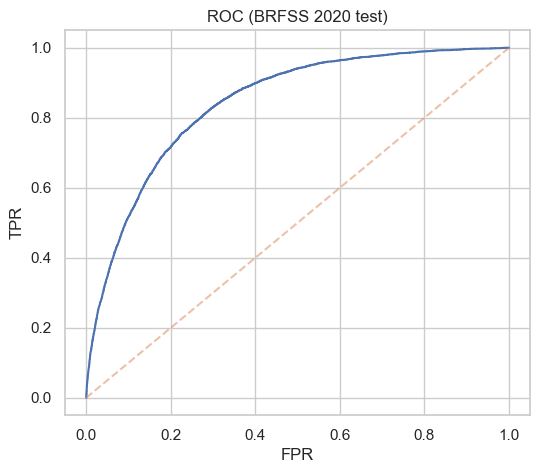

In [51]:
# F2 — train baseline
clf = LogisticRegression(
    max_iter=1000,
    n_jobs=None,            # n_jobs removed for some versions; keep None
    class_weight="balanced" # helps a bit if target is imbalanced
)
clf.fit(X_train, y_train)

# Overall performance
proba_test = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, proba_test)
fpr, tpr, thr = roc_curve(y_test, proba_test)
pred_test = (proba_test >= 0.5).astype(int)
acc = accuracy_score(y_test, pred_test)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred_test, average="binary")

print(f"AUC: {auc:.3f} | Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],"--",alpha=0.5)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (BRFSS 2020 test)")
plt.show()

,RaceH,n,AUC,ACC,Prec,Rec,F1
4,NH_White,49043,0.840950,0.734233,0.228902,0.800089,0.355964
2,Hispanic,5490,0.823332,0.829144,0.179664,0.629758,0.279570
3,NH_Black,4588,0.825144,0.746295,0.193862,0.748555,0.307967
5,Other/Multiple,2185,0.850097,0.763387,0.220395,0.757062,0.341401
1,Asian,1613,0.849879,0.902046,0.189349,0.603774,0.288288
0,AIAN,1040,0.854703,0.721154,0.248619,0.833333,0.382979


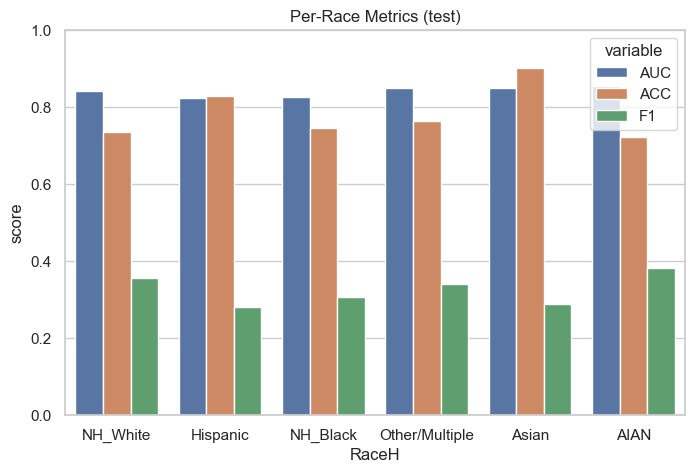

Overall Precision: 0.224, Recall: 0.785, F1: 0.348


,RaceH,Precision,Recall,F1
0,AIAN,0.248619,0.833333,0.382979
1,Asian,0.189349,0.603774,0.288288
2,Hispanic,0.179664,0.629758,0.279570
3,NH_Black,0.193862,0.748555,0.307967
4,NH_White,0.228902,0.800089,0.355964
5,Other/Multiple,0.220395,0.757062,0.341401


In [60]:
# F3 join predictions with RaceH, length-safe

# 1) Make sure split covers every row in X; if the CSV is missing or wrong, rebuild it.
from sklearn.model_selection import train_test_split

if (DATA_PROCESSED / "brfss2020_split.csv").exists():
    split_csv = pd.read_csv(DATA_PROCESSED / "brfss2020_split.csv")
    if {"row_id","split"}.issubset(split_csv.columns) and len(split_csv) == len(X):
        split = split_csv.set_index("row_id")["split"]
    else:
        # rebuild split if file looks off
        strat = brfss20_eda["RaceH"].astype(str) + y.astype(str)
        tr, te = train_test_split(X.index, test_size=0.2, random_state=42, stratify=strat)
        split = pd.Series("train", index=X.index)
        split.loc[te] = "test"
else:
    strat = brfss20_eda["RaceH"].astype(str) + y.astype(str)
    tr, te = train_test_split(X.index, test_size=0.2, random_state=42, stratify=strat)
    split = pd.Series("train", index=X.index)
    split.loc[te] = "test"

# 2) full-length score vector and fill only the test rows with proba_test
scores = np.full(len(X), np.nan)
test_pos = np.where(split.values == "test")[0]   # positions (0..n-1) of test rows
scores[test_pos] = proba_test                    # proba_test is len(test_pos)

# 3) Assemble dataframe aligned by position
score_df = pd.DataFrame({
    "row_id": np.arange(len(X)),
    "split": split.values,
    "y": y.values.astype(int),
    "score": scores
})

# 4) Attach RaceH from the EDA file by position
race_pos = brfss20_eda["RaceH"].reset_index(drop=True)
score_df["RaceH"] = race_pos

# 5) Compute per-group metrics on TEST set
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_fscore_support

def group_metrics(df, score_col="score", y_col="y", thr=0.5):
    out = []
    for g, sub in df.groupby("RaceH", dropna=False):
        sub = sub.dropna(subset=[score_col])
        if len(sub) < 50:
            continue
        y_true = sub[y_col].to_numpy()
        y_hat  = (sub[score_col].to_numpy() >= thr).astype(int)
        auc_g  = roc_auc_score(y_true, sub[score_col]) if len(np.unique(y_true))>1 else np.nan
        acc_g  = accuracy_score(y_true, y_hat)
        prec_g, rec_g, f1_g, _ = precision_recall_fscore_support(y_true, y_hat, average="binary", zero_division=0)
        out.append({"RaceH": g, "n": len(sub), "AUC": auc_g, "ACC": acc_g, "Prec": prec_g, "Rec": rec_g, "F1": f1_g})
    return pd.DataFrame(out).sort_values("n", ascending=False)

fair = group_metrics(score_df.query("split=='test'"))
display(fair)

plt.figure(figsize=(8,5))
sns.barplot(
    data=fair.melt(id_vars=["RaceH","n"], value_vars=["AUC","ACC","F1"]),
    x="RaceH", y="value", hue="variable"
)
plt.ylim(0,1); plt.title("Per-Race Metrics (test)"); plt.ylabel("score")
plt.show()

#F1 - (2 * precision * recall)/(precision + recall)
from sklearn.metrics import precision_recall_fscore_support

# y_true = actual labels, y_pred = model predictions
y_pred = (proba_test > 0.5).astype(int)

# Overall F1 score
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Overall Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

#compute by race
# test data, true labels, predictions, and race column
df = X_test.copy()
df["y_true"] = y_test
df["y_pred"] = y_pred
df["RaceH"] = brfss20_eda.loc[X_test.index, "RaceH"].values

metrics_by_race = []

for race in sorted(df["RaceH"].unique()):
    idx = df["RaceH"] == race
    prec, rec, f1, _ = precision_recall_fscore_support(y_test[idx], y_pred[idx], average='binary')
    metrics_by_race.append({"RaceH": race, "Precision": prec, "Recall": rec, "F1": f1})

pd.DataFrame(metrics_by_race)

In [54]:
# F4 — example: save the last figure
fig_path = DOCS / "fig_per_race_metrics.png"
plt.gcf().savefig(fig_path, dpi=200, bbox_inches="tight")
fig_path

PosixPath('/Users/alastsamimi/Library/Mobile Documents/com~apple~CloudDocs/DS Capstone/PythonProject/25-FALL-ASAMIMI/docs/fig_per_race_metrics.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# long-form weekly CDC table
want_races = ["NH_White","NH_Black","Hispanic","Asian","AIAN"]

g = (
    cdc.query("age_group == '50 - 64 Years'")
       .query("race_h in @want_races")
       .copy()
)

# Order legend consistently
g["race_h"] = pd.Categorical(g["race_h"], categories=want_races, ordered=True)

plt.figure(figsize=(11,6))
sns.lineplot(data=g, x="end_of_week", y="death_rate", hue="race_h")
plt.title("COVID-19 Death Rates by Race (50–64y)")
plt.ylabel("Death rate per 100,000"); plt.xlabel("Week")
plt.legend(title="Group", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

disp = cdc_disp.copy()
keep_cols = ["end_of_week","age_group"] + [c for c in disp.columns if c.startswith("death_ratio_")]
disp = disp[keep_cols]

disp_long = disp.melt(id_vars=["end_of_week","age_group"],
                      var_name="metric", value_name="ratio")
disp_long["group"] = disp_long["metric"].str.replace("death_ratio_","", regex=False)

plt.figure(figsize=(11,6))
sns.lineplot(data=disp_long.query("age_group=='50 - 64 Years'"),
             x="end_of_week", y="ratio", hue="group")
plt.title("Death-rate ratio vs NH_White (50–64y)")
plt.ylabel("Rate ratio"); plt.xlabel("Week")
plt.tight_layout()
plt.show()

In [61]:
DOCS.mkdir(exist_ok=True)
plt.savefig(DOCS / "roc_curve.png", dpi=200)
plt.savefig(DOCS / "fairness_barplot.png", dpi=200)
plt.savefig(DOCS / "cdc_deathrates.png", dpi=200)
plt.savefig(DOCS / "brfss_heartdisease.png", dpi=200)
plt.savefig(DOCS / "brfss_bmi_hist.png", dpi=200)
plt.savefig(DOCS / "deathrate_ratio.png", dpi=200)

<Figure size 640x480 with 0 Axes>

In [66]:
ROOT = Path.cwd().parents[0]
DATA_PROCESSED = ROOT / "data" / "processed"
DOCS = ROOT / "docs"
DOCS.mkdir(exist_ok=True, parents=True)

# 1. CDC weekly data
cdc = pd.read_parquet(DATA_PROCESSED / "cdc_weekly_clean.parquet")
cdc.to_csv(DOCS / "cdc_weekly_for_tableau.csv", index=False)

# 2. CDC disparities data -death-rate ratios vs NH_White
cdc_disp = pd.read_parquet(DATA_PROCESSED / "cdc_disparities_by_week.parquet")
cdc_disp.to_csv(DOCS / "cdc_disparities_for_tableau.csv", index=False)

# 3. BRFSS survey data
brfss20_eda = pd.read_parquet(DATA_PROCESSED / "brfss2020_eda.parquet")
brfss22_eda = pd.read_parquet(DATA_PROCESSED / "brfss2022_eda.parquet")
brfss20_eda.to_csv(DOCS / "brfss2020_eda_for_tableau.csv", index=False)
brfss22_eda.to_csv(DOCS / "brfss2022_eda_for_tableau.csv", index=False)

#4. Export SDOH Equity Table
equity = pd.read_parquet(DATA_PROCESSED / "equity_selected.parquet")
equity.to_csv(DOCS / "equity_sdohtable_for_tableau.csv", index=False)

# 5. Export AI Fairness Metrics
fair = group_metrics(score_df.query("split=='test'"))
fair_out = (
    fair[["RaceH", "AUC", "ACC", "F1"]]
    .sort_values("RaceH")
    .round(3)
)

fair_out.to_csv(DOCS / "equity_for_tableau.csv", index=False)

print("✅ Exported CSVs to docs/:")
print("   - cdc_weekly_for_tableau.csv")
print("   - cdc_disparities_for_tableau.csv")
print("   - brfss2020_eda_for_tableau.csv")
print("   - brfss2022_eda_for_tableau.csv")
print("   - equity_sdohtable_for_tableau.csv")
print("   - equity_for_tableau.csv  ✅ (AI fairness summary)")
print()
print("AI fairness file columns:", fair_out.columns.tolist())
print("Rows:", len(fair_out))
display(fair_out)

✅ Exported CSVs to docs/:
   - cdc_weekly_for_tableau.csv
   - cdc_disparities_for_tableau.csv
   - brfss2020_eda_for_tableau.csv
   - brfss2022_eda_for_tableau.csv
   - equity_sdohtable_for_tableau.csv
   - equity_for_tableau.csv  ✅ (AI fairness summary)

AI fairness file columns: ['RaceH', 'AUC', 'ACC', 'F1']
Rows: 6


,RaceH,AUC,ACC,F1
0,AIAN,0.855,0.721,0.383
1,Asian,0.850,0.902,0.288
2,Hispanic,0.823,0.829,0.280
3,NH_Black,0.825,0.746,0.308
4,NH_White,0.841,0.734,0.356
5,Other/Multiple,0.850,0.763,0.341


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd

# Calculate ROC curve for test set
fpr, tpr, thr = roc_curve(y_test, proba_test)
auc_score = roc_auc_score(y_test, proba_test)

roc_df = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr,
    "Threshold": thr
})
roc_df["AUC"] = auc_score  # store AUC for display if needed

# Save for Tableau
roc_df.to_csv(DOCS / "roc_for_tableau.csv", index=False)

print(f"✓ ROC data exported with AUC = {auc_score:.3f}")

✓ ROC data exported with AUC = 0.842
